In [403]:
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree,DecisionTreeRegressor
from matplotlib import  pyplot as plt
df = pd.read_csv("../assets/cleaned_data.csv")
df.drop(columns=["Unnamed: 0"],inplace=True)
df.sample(3)

,Status,Experience,Skills,Certification,Degree
190,1,3,3,0,2.0
38,1,0,10,0,0.0
486,1,3,9,0,1.0


In [404]:
X=df.iloc[:,1:5]

In [405]:
no_of_ones=df[df["Status"]==1].shape[0]
no_of_zeros=df[df["Status"]==0].shape[0]

In [406]:
df['pre1(log-odds)'] = np.log(no_of_ones/no_of_zeros)
df.sample(3)

,Status,Experience,Skills,Certification,Degree,pre1(log-odds)
274,1,0,5,0,2.0,2.197225
172,1,1,7,0,2.0,2.197225
400,1,1,9,1,0.0,2.197225


In [407]:
df['pre1(probability)'] = 1/(1+np.exp(-df["pre1(log-odds)"]))
df.sample(3)

,Status,Experience,Skills,Certification,Degree,pre1(log-odds),pre1(probability)
110,1,2,4,1,1.0,2.197225,0.9
355,1,5,5,1,0.0,2.197225,0.9
70,1,5,8,0,1.0,2.197225,0.9


***Finding error***

In [408]:
df["res1"]=df["Status"]-df["pre1(probability)"]
df.sample(3)

,Status,Experience,Skills,Certification,Degree,pre1(log-odds),pre1(probability),res1
275,1,5,7,1,0.0,2.197225,0.9,0.1
313,1,4,8,0,0.0,2.197225,0.9,0.1
185,1,4,7,0,2.0,2.197225,0.9,0.1


In [409]:
reg1 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg1.fit(X, df.iloc[:,-1])

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

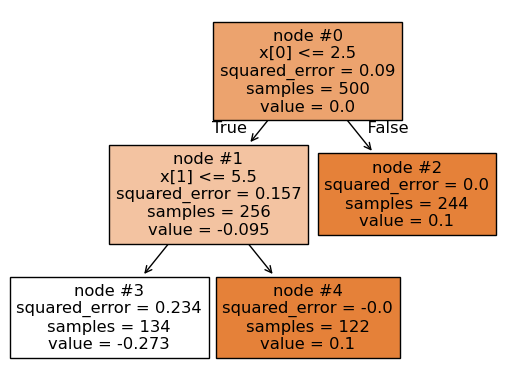

In [410]:
plot_tree(reg1,filled=True, node_ids=True)
plt.show()

In [411]:
df['leaf_entry1'] = reg1.apply(X)
df.sample(5)

,Status,Experience,Skills,Certification,Degree,pre1(log-odds),pre1(probability),res1,leaf_entry1
375,0,0,4,0,0.0,2.197225,0.9,-0.9,3
448,1,3,0,0,0.0,2.197225,0.9,0.1,2
115,0,2,2,0,1.0,2.197225,0.9,-0.9,3
153,1,3,6,1,0.0,2.197225,0.9,0.1,2
66,1,1,2,0,2.0,2.197225,0.9,0.1,3


In [412]:
def return_logs1(leaf):
  """
  formula of finding error for models other than first mode
  sum of residuals / sum of(previoud probability * (1-previous probability))
  """
  temp_df = df[df['leaf_entry1'] == leaf]
  num = temp_df['res1'].sum()

  den = sum(temp_df['pre1(probability)'] * (1 - temp_df['pre1(probability)']))
  return round(num/den,2)

In [413]:
df['pre2(log-odds)'] = df['pre1(log-odds)'] + df['leaf_entry1'].apply(return_logs1)

In [414]:
df['pre2(probability)'] = 1/(1+np.exp(-df['pre2(log-odds)']))

In [415]:
df['res2'] = df['Status'] - df['pre2(probability)']
df.sample(5)

,Status,Experience,Skills,Certification,Degree,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2
357,1,0,6,0,0.0,2.197225,0.9,0.1,4,3.307225,0.964676,0.035324
440,1,2,10,0,2.0,2.197225,0.9,0.1,4,3.307225,0.964676,0.035324
5,1,1,10,0,1.0,2.197225,0.9,0.1,4,3.307225,0.964676,0.035324
359,1,2,5,1,0.0,2.197225,0.9,0.1,3,-0.832775,0.303059,0.696941
292,1,1,6,0,0.0,2.197225,0.9,0.1,4,3.307225,0.964676,0.035324


In [416]:
reg2 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg2.fit(X, df.iloc[:,-1])

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

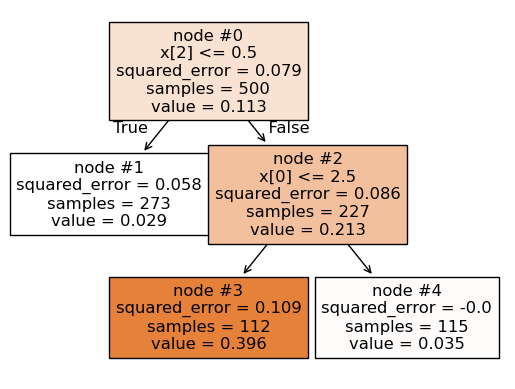

In [417]:
plot_tree(reg2,filled=True, node_ids=True)
plt.show()

In [418]:
df['leaf_entry2'] = reg2.apply(X)

In [419]:
def return_logs2(leaf):
  temp_df=df[df['leaf_entry2'] == leaf]
  num = temp_df['res2'].sum()
  den = sum(temp_df['pre2(probability)'] * (1 - temp_df['pre2(probability)']))
  return round(num/den,2)

In [420]:
df['pre3(log-odds)'] = df['pre1(log-odds)'] + df['pre2(log-odds)'] + df['leaf_entry2'].apply(return_logs2)
df['pre3(probability)'] = 1/(1+np.exp(-df['pre3(log-odds)']))

In [425]:
df['res3'] = df['Status'] - df['pre3(probability)']
df.sample(4)

,Status,Experience,Skills,Certification,Degree,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2,pre3(log-odds),pre3(probability),res3
290,1,3,4,0,2.0,2.197225,0.9,0.1,2,3.307225,0.964676,0.035324,1,5.864449,0.997169,0.002831
135,1,1,7,1,2.0,2.197225,0.9,0.1,4,3.307225,0.964676,0.035324,3,8.534449,0.999803,0.000197
377,1,2,3,1,2.0,2.197225,0.9,0.1,3,-0.832775,0.303059,0.696941,3,4.394449,0.987805,0.012195
423,1,0,9,1,2.0,2.197225,0.9,0.1,4,3.307225,0.964676,0.035324,3,8.534449,0.999803,0.000197


prediction

In [424]:

q=np.array([1,1,0,0])
log_odds = np.log(no_of_ones / no_of_zeros)


# Pass through the first decision tree
leaf1 = reg1.apply([q])[0]  # Find the leaf for input `q`

log_odds += return_logs1(leaf1)  # Add the log-odds from the first tree

# Pass through the second decision tree
leaf2 = reg2.apply([q])[0]  # Find the leaf for input `q` in the second tree
log_odds += return_logs2(leaf2)  # Add the log-odds from the second tree

# Final probability
probability = 1 / (1 + np.exp(-log_odds))
adjusted_pprob=(probability>=0.5).astype(int)
print("Final predicted probability:", probability)
print("adjusted probability",adjusted_pprob)


Final predicted probability: 0.3839595490067199
adjusted probability 0


/home/jeevan/Desktop/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/home/jeevan/Desktop/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
